<a href="https://colab.research.google.com/github/cindykhris/SummerInternship2020/blob/master/PCA_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis (PCA) and Visualization using Python

**Introduction**

Description: In this study, I analyzed the gene expression of coronaviruses (CoVs) infections to determine how each virus differs when causing a disease. Here, I focused the analysis on samples derived from SARS-CoV, MERS, and SARS-CoV-2. 
The raw sequence data (fastq files) for the SARS-CoV-1 was downloaded from GEO [GSE56192](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE56192), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the SARS-CoV-2 infections were downloaded from GEO [GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the MERS infections were downloaded from GEO [GSE139516](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE139516), including their corresponding Mock-treated controls. Gene expression matrixes were generated using the [BioInfoPlatform](https://server.t-bio.info) described below:


*   PreProcessing
    
      * PCR clean - to remove duplicates from the PCR run  thus reducing redundancy. 
      * Trimmomatic - removes adapter sequences
*   Mapping 
      * Bowtie-2t
* Quantification 

    * RSEM -  Fragment Per Kilobase of transcript per Million mapped reads  for Paired-End Reads

*   Differential Expression

    * DESeq2

Principal Component Analysis steps described in [Renesh Bedre github](https://reneshbedre.github.io/blog/pca_3d.html) were used to analyse the generated gene expression matrix. 

In [1]:
pip install bioinfokit

     |████████████████████████████████| 51kB 1.8MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-0.9.6-cp36-none-any.whl size=32041 sha256=0dcadf158528d74d3eea589430144c5526f3f69a9798bbd9b0f14fe4c02df69f
  Stored in directory: /root/.cache/pip/wheels/17/e3/d1/dc69854b469f0ad51b2e1c913690e4cc9aa28aae9375f913fc
  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=a181e2b14bb2e8544e5d2208d459e201ca4c907be66ef0a25882e4da4f695c35
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#Load SARS gene expression
df = pd.read_table('drive/My Drive/SummerResearch/DESeq_Covid-19_Series_2__expression_genes.txt')
df = df.drop('id',axis=1)
df.columns

Index(['group_1_sample_10_SRR11412241_SE', 'group_1_sample_11_SRR11412240_SE',
       'group_1_sample_12_SRR11412239_SE', 'group_1_sample_1_SRR11412250_SE',
       'group_1_sample_2_SRR11412249_SE', 'group_1_sample_3_SRR11412248_SE',
       'group_1_sample_4_SRR11412247_SE', 'group_1_sample_5_SRR11412246_SE',
       'group_1_sample_6_SRR11412245_SE', 'group_1_sample_7_SRR11412244_SE',
       'group_1_sample_8_SRR11412243_SE', 'group_1_sample_9_SRR11412242_SE',
       'group_2_sample_10_SRR11412254_SE', 'group_2_sample_11_SRR11412253_SE',
       'group_2_sample_12_SRR11412252_SE', 'group_2_sample_1_SRR11412260_SE',
       'group_2_sample_2_SRR11412259_SE', 'group_2_sample_3_SRR11412258_SE',
       'group_2_sample_4_SRR11412257_SE', 'group_2_sample_5_SRR11412251_SE',
       'group_2_sample_6_SRR11412262_SE', 'group_2_sample_7_SRR11412261_SE',
       'group_2_sample_8_SRR11412256_SE', 'group_2_sample_9_SRR11412255_SE'],
      dtype='object')

In [9]:
df = df.rename(columns={
       'group_1_sample_10_SRR11412241_SE' : 'A', 'group_1_sample_11_SRR11412240_SE' : 'A',
       'group_1_sample_12_SRR11412239_SE' : 'A', 'group_1_sample_1_SRR11412250_SE' : 'A',
       'group_1_sample_2_SRR11412249_SE' : 'A', 'group_1_sample_3_SRR11412248_SE' : 'A',
       'group_1_sample_4_SRR11412247_SE' : 'A', 'group_1_sample_5_SRR11412246_SE' : 'A',
       'group_1_sample_6_SRR11412245_SE' : 'A', 'group_1_sample_7_SRR11412244_SE' : 'A',
       'group_1_sample_8_SRR11412243_SE' : 'A', 'group_1_sample_9_SRR11412242_SE' : 'A',
       'group_2_sample_10_SRR11412254_SE' : 'B', 'group_2_sample_11_SRR11412253_SE' : 'B',
       'group_2_sample_12_SRR11412252_SE' : 'B', 'group_2_sample_1_SRR11412260_SE' : 'B',
       'group_2_sample_2_SRR11412259_SE' : 'B', 'group_2_sample_3_SRR11412258_SE' : 'B',
       'group_2_sample_4_SRR11412257_SE' : 'B', 'group_2_sample_5_SRR11412251_SE' : 'B',
       'group_2_sample_6_SRR11412262_SE' : 'B', 'group_2_sample_7_SRR11412261_SE' : 'B',
       'group_2_sample_8_SRR11412256_SE' : 'B', 'group_2_sample_9_SRR11412255_SE' : 'B'    
    })

In [10]:
df.head(5)

,A,A,A,A,A,A,A,A,A,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B
0,295.00,261.00,290.00,94.00,100.00,77.00,94.00,139.00,142.00,149.00,142.00,260.00,398.03,415.99,431.00,170.00,214.00,253.00,296.00,407.88,208.00,213.00,249.00,263.77
1,224.00,198.00,185.00,81.00,77.00,82.00,74.00,115.00,122.00,107.00,134.00,213.00,326.00,314.00,332.00,177.00,178.00,240.00,226.00,311.00,159.00,167.00,233.00,253.00
2,58.21,48.04,46.20,30.27,19.55,23.85,16.13,27.92,22.34,33.01,31.21,59.25,84.65,77.69,63.66,32.10,25.44,39.44,63.45,85.72,34.17,40.52,66.10,58.14
3,149.12,146.22,146.82,56.73,54.50,56.91,62.00,70.08,73.66,65.99,74.96,148.92,211.29,205.55,208.37,95.66,100.55,142.10,150.62,195.60,95.83,116.48,129.67,129.95
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [11]:
#Standarization
df_st = StandardScaler().fit_transform(df)

In [12]:
#see few rows of standarized dataset
pd.DataFrame(df_st, columns=df.columns).head()

,A,A,A,A,A,A,A,A,A,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B
0,0.265291,0.178408,0.220015,0.118561,0.134505,0.043729,0.100891,0.161922,0.163553,0.169112,0.147782,0.210629,0.329605,0.344480,0.304127,0.116719,0.203347,0.167732,0.228669,0.272328,0.231838,0.233690,0.132841,0.150692
1,0.138394,0.079227,0.056376,0.067639,0.046030,0.061375,0.030914,0.090816,0.105414,0.057398,0.126680,0.125247,0.222768,0.196155,0.182538,0.131298,0.129350,0.146359,0.115822,0.154079,0.114250,0.125425,0.110032,0.135457
2,-0.157919,-0.156855,-0.159940,-0.131076,-0.174966,-0.143854,-0.171564,-0.167182,-0.184291,-0.139404,-0.144446,-0.154061,-0.135210,-0.147512,-0.147028,-0.170485,-0.184235,-0.183370,-0.146226,-0.120891,-0.185311,-0.172256,-0.127899,-0.140194
3,0.004562,-0.002290,-0.003127,-0.027429,-0.040522,-0.027175,-0.011072,-0.042272,-0.035107,-0.051682,-0.029048,0.008837,0.052627,0.038436,0.030700,-0.038109,-0.029847,-0.014593,-0.005699,0.013225,-0.037342,0.006522,-0.037274,-0.038611
4,-0.261957,-0.232485,-0.231941,-0.249647,-0.250170,-0.228028,-0.228000,-0.249902,-0.249231,-0.227206,-0.226768,-0.261697,-0.260766,-0.260497,-0.225214,-0.237340,-0.236526,-0.248211,-0.246902,-0.225519,-0.267311,-0.267623,-0.220705,-0.222439


In [13]:
#perfom PCA
pca_out = PCA().fit(df_st)

In [14]:
#get the component variance
#proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([9.89951813e-01, 6.08993089e-03, 2.03779329e-03, 7.08819662e-04,
       4.43125242e-04, 2.28346678e-04, 1.68844094e-04, 4.12120695e-05,
       3.61930894e-05, 3.25609492e-05, 3.07784020e-05, 2.68038586e-05,
       2.47100614e-05, 2.20934053e-05, 2.17031984e-05, 1.91197122e-05,
       1.83346166e-05, 1.76587463e-05, 1.52317801e-05, 1.50106562e-05,
       1.41344524e-05, 1.37763080e-05, 1.14928767e-05, 1.05131111e-05])

In [15]:
#cumulative propotion of variance (from PC1 to PC6)
np.cumsum(pca_out.explained_variance_ratio_
          )

array([0.98995181, 0.99604174, 0.99807954, 0.99878836, 0.99923148,
       0.99945983, 0.99962867, 0.99966988, 0.99970608, 0.99973864,
       0.99976942, 0.99979622, 0.99982093, 0.99984302, 0.99986473,
       0.99988385, 0.99990218, 0.99991984, 0.99993507, 0.99995008,
       0.99996422, 0.99997799, 0.99998949, 1.        ])

In [16]:
#get component loadings (correlation coefficint between original variables and the component )
loadings = pca_out.components_
num_pc   = pca_out.n_features_
pc_list  = ['PC'+str(i) for i in list(range(1,num_pc+1))]


In [17]:
loading_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loading_df['variable'] = df.columns.values
loading_df = loading_df.set_index('variable')
loading_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
variable,,,,,,,,,,,,,,,,,,,,,,,,
A,0.204573,-0.032793,-0.219433,-0.380355,0.155769,-0.115893,0.143855,0.099455,-0.006451,-0.019097,0.041702,0.015109,-0.037898,0.006189,-0.138514,-0.015206,0.157352,-0.779216,0.055774,0.105339,0.033093,-0.139364,0.065361,-0.042125
A,0.204704,0.050471,0.160068,-0.343715,0.119127,-0.141166,0.250070,-0.083093,0.004157,0.066844,-0.024127,-0.005991,0.013934,0.042566,0.175302,-0.021344,-0.280247,0.304746,-0.028194,0.455138,0.086012,-0.512233,-0.136549,0.046401
A,0.204690,0.039287,0.172993,-0.345490,0.122241,-0.130379,0.278803,-0.006284,-0.028432,0.088234,0.033356,-0.016588,-0.025961,0.050882,0.066639,-0.067558,-0.463551,0.016224,-0.053389,-0.395145,-0.288631,0.463657,0.052206,-0.012803
A,0.203686,-0.289661,-0.110176,0.079634,-0.090451,-0.284734,-0.184939,-0.469990,-0.686791,0.124753,0.064752,-0.091686,-0.034178,0.032434,-0.052351,-0.077195,-0.000674,0.002700,0.006254,0.010831,0.016154,0.021250,-0.011784,-0.000388
A,0.203599,-0.298770,-0.117874,0.069378,-0.105014,-0.290370,-0.175584,-0.310669,0.674516,0.401534,0.053807,0.008244,-0.003461,-0.007521,0.017952,0.074722,-0.013003,-0.011630,-0.009334,-0.038688,0.021836,0.015176,0.007765,0.009712
A,0.203966,-0.231286,0.203248,0.144589,-0.159929,-0.321748,-0.015734,0.123364,0.142248,-0.707321,0.371258,-0.165269,0.005163,-0.066081,0.018918,-0.024597,-0.060928,-0.011078,0.036068,0.006710,-0.022497,-0.027888,-0.010397,-0.022598
A,0.203834,-0.247851,0.208333,0.122611,-0.165561,-0.333592,-0.054890,0.571378,-0.131508,0.163533,-0.498731,0.237774,0.041941,0.016431,0.103344,0.018230,0.081584,-0.004681,-0.019540,0.004631,-0.012315,0.002065,0.025348,0.013356
A,0.204405,-0.187037,-0.079979,-0.145383,-0.127396,0.368416,-0.158544,-0.168278,0.111404,-0.295203,-0.627868,-0.389241,-0.082446,-0.026423,-0.026791,-0.083034,-0.165260,-0.033169,-0.003241,-0.004847,0.025696,0.007576,0.006874,-0.026236
A,0.204412,-0.189360,-0.061866,-0.148468,-0.135610,0.352657,-0.162733,-0.099590,-0.000673,-0.199149,0.112549,0.789760,-0.060659,0.112620,-0.004227,-0.014913,-0.131904,0.030895,0.005469,0.003035,0.072262,0.027579,-0.015438,0.008070


In [18]:
#get correalation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt



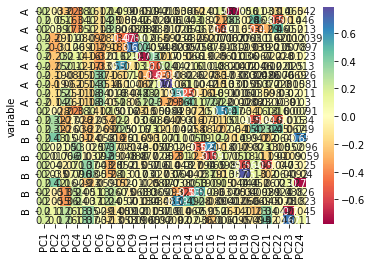

In [19]:
ax = sns.heatmap(loading_df, annot=True, cmap='Spectral')
plt.show()

In [20]:
#Principal component (PC) retention
#get eigenvalues (from PC1 to PC6)
pca_out.explained_variance_

array([2.37596324e+01, 1.46163195e-01, 4.89086629e-02, 1.70122368e-02,
       1.06353590e-02, 5.48050225e-03, 4.05239282e-03, 9.89122513e-04,
       8.68662990e-04, 7.81488730e-04, 7.38706177e-04, 6.43313967e-04,
       5.93061167e-04, 5.30259334e-04, 5.20894057e-04, 4.58888331e-04,
       4.40045410e-04, 4.23823983e-04, 3.65574862e-04, 3.60267712e-04,
       3.39238121e-04, 3.30642370e-04, 2.75838201e-04, 2.52323045e-04])

In [21]:
#get screen plot (for scree or elbow test)


In [22]:
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])
#scree plot will be saved in the same directory with name screenplot.png

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [23]:
#PCA loadings plot
#get PCA loadings plots (2D and 3D)
#2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))


In [24]:
# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [25]:
#PCA biplot
pca_scores = PCA().fit_transform(df_st)

#get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

#get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))
